# Lab 1: Fremont Bridge Data Analysis
### Part 1: Measures of Center and Histrograms

The East Mean is: 1265
The West Mean is: 1352
The East Median is: 1155
The West Median is: 1262
There is NO unique mode for the eastbound data
There is NO unique mode for the westbound data


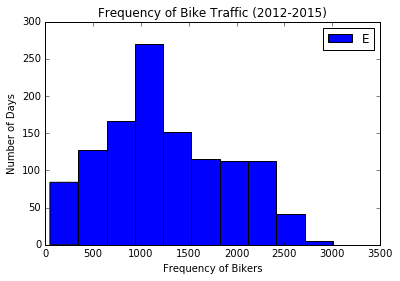

In [2]:
#Make sure graph will appear
%matplotlib inline
import matplotlib.pyplot as plt
#open and save the file for reading
data_file = open("FreBridgeLarge.csv", "r");
#create an empty list to store the data
data_list = [];
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii);

#remove the first element (column header)
del data_list[0];
#create empty lists for westbound and eastbound bikes
west = [];
east = [];    
for jj in range(len(data_list)):
    #strip off the \n (newline)
    data_list[jj] = data_list[jj].replace("\n", "");
    #make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #add data to specific lists for west and east
    west.append(int(data_list[jj][1]));
    east.append(int(data_list[jj][2]));

#Import statistics library to measure mean, median, mode, etc.
import statistics as stat

#Calculating and printing mean
print ("The East Mean is:", round(stat.mean(east)))
print ("The West Mean is:", round(stat.mean(west)))

#Calculating and printing median
print ("The East Median is:", stat.median(east))
print ("The West Median is:", stat.median(west))

#Calculating and printing mode
try:
    print ("The East Mode is:", stat.mode(east))
except:
    print ("There is NO unique mode for the eastbound data")
    
try:
    print ("The West Mode is:", stat.mode(west))    
except:
    print ("There is NO unique mode for the westbound data")

#Graphing the eastbound data
plt.hist(east)
plt.legend("E")
plt.title("Frequency of Bike Traffic (2012-2015)")
plt.xlabel("Frequency of Bikers")
plt.ylabel("Number of Days")


### Part 1: Conclusion
Because there is no unique mode for either data sets, it can be ruled out as an accurate measure of central tendency. Between Median and Mean, median would be the better indicator of central tendency. This is because mean is far more susceptible to influence from outliers in contrast to median. For this data set, it would not be especially difficult to calculate upper and lower bounds to find outliers but it would be very inefficient and increasingly impractical as the data sets grow larger. Additionlly, the histogram of the data shows a right skew and skews in data representation and indicators of bias or a displaced mean. Therefore, median would be our best measure of center. As printed above, the Eastbound Meadian is 1155 and the Westbound Median is 1262. What these numbers mean contextually is that approximately 1155 and 1262 bikers cross the bridge on a given day, respectively. 

### Part 2: Predicting Bike Traffic

Based on given dataset:
# of Bikers on each Friday in July: [4100, 3887, 3628, 3813, 3772, 4106, 4072, 4135, 4168, 2579, 3963, 3915, 3696]
Average # of Bikers on Fridays in July: 3833 Bikers

Calculating Outliers:
Quartile 1: 3772.0
Mean: 3833
Quartile 3: 4100.0
Lower Outlier Limit: 3280.0
Upper Outlier Limit: 4592.0
Sorted July Data: [2579, 3628, 3696, 3772, 3813, 3887, 3915, 3963, 4072, 4100, 4106, 4135, 4168]
2579 is below the Lower Outlier Limit and therefore is an outlier
New July Data [3628, 3696, 3772, 3813, 3887, 3915, 3963, 4072, 4100, 4106, 4135, 4168]

Final Results
New Mean of Data: 3938
Standard Deviation: 182
95% Confidence Interval: [ 3574 , 4302 ]
I am 95% confident that the true mean number of bikers on any friday in July will be in the interval: [3574, 4302]


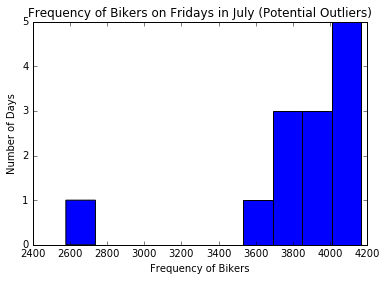

In [60]:
#Making sure graph will appear
%matplotlib inline
import matplotlib.pyplot as plt
#open and save the file for reading
data_file = open("FreBridgeLarge.csv", "r");
#create an empty list to store the data
data_list = [];
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii);

#remove the first element (column header)
del data_list[0];

#create empty lists for the data for the west, east, and both
west = []
east = []
both = []

#edit down the list so its just values
for jj in range(len(data_list)):
    #strip off the \n (newline)
    data_list[jj] = data_list[jj].replace("\n", "");
    #make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #add data to specific lists for west and east
    west.append(int(data_list[jj][1]));
    east.append(int(data_list[jj][2]));

#import the datetime library and establish the start date for the data as a friday allowing us to iterate by 7 days
#so that we can only get data for fridays
import datetime
from datetime import timedelta
date = datetime.date(2015, 12, 25)

#Add the west and east data together into the empty list, "both"
for x in range(len(west)):
    both.append(west[x]+east[x])

#Create new list for data from July
data_july = []

#Check every friday in the data set and append data from fridays in July to the the list. "data_july"
for dateindex in range(6, len(data_list), 7):
    datechange = timedelta(days=7)
    date -= datechange
    if date.month==7:
        data_july.append(both[dateindex])

#Import statistics and numpy libraries
import statistics as stat
import numpy as np

#Print current data
print ("Based on given dataset:")
print("# of Bikers on each Friday in July:", data_july)
ave_july = round(stat.mean(data_july))
print("Average # of Bikers on Fridays in July:", ave_july, "Bikers")
#Make histogram of data
plt.hist(data_july)
plt.title("Frequency of Bikers on Fridays in July (Potential Outliers)")
plt.xlabel("Frequency of Bikers")
plt.ylabel("Number of Days")

#An empty line to make text clearer
print ("")

#Calculating Outliers
print ("Calculating Outliers:")
#Find quartiles 1 and 3 using the percentile tool from the numpy library
q1 = np.percentile(data_july, 25)
print ("Quartile 1:", q1)
print ("Mean:", ave_july)
q3 = np.percentile(data_july, 75)
print ("Quartile 3:", q3)
#Calculate the interquartile range
iqr = q3-q1
#Find the upper and lower limits for outliers
outlierLimitLow = q1 - 1.5*(iqr)
outlierLimitHigh = q3 + 1.5*(iqr)
print ("Lower Outlier Limit:", outlierLimitLow)
print ("Upper Outlier Limit:", outlierLimitHigh)
#Sort data set in ascending order to easily identify outliers
data_july.sort()
print ("Sorted July Data:", data_july)
print ("2579 is below the Lower Outlier Limit and therefore is an outlier")

#Removing outlier from list
data_july.remove(2579)
print ("New July Data", data_july)

#Adding blank line
print ("")

#Print final data
print("Final Results")
newAveJuly = round(stat.mean(data_july))
print ("New Mean of Data:", newAveJuly)

#Find confidence interval using standard deviation and print the results
standardDev = round(stat.stdev(data_july))
print ("Standard Deviation:", standardDev)
marginOE = standardDev * 2
interval_low = newAveJuly - marginOE
interval_high = newAveJuly + marginOE
print ("95% Confidence Interval: [",round(interval_low),",",round(interval_high),"]")
print ("I am 95% confident that the true mean number of bikers on any friday in July will be in the interval: [3574, 4302]")

### Part 2: Conclusion
In this situation, we have 13 data points which makes it very easy to calculate upper and lower bounds and find any outliers. Looking at the histogram, it clearly suggests the presence of an outlier and upon calculations, there was an outlier at 2579. After removing the outlier, the mean became a more reliable form of measurement. Simply extrapolating a number for an upcoming friday based on past fridays would likely be inaccurate so for the purposes of predictions, a confidence interval would be be more appropriate. I made a 95% confidence interval using the new mean (mean calculated once the outlier was removed) that indicates that we can be 95% confident that the true mean of bike traffic on fridays in July is within the interval [3574, 4302]. To find this confidence interval, I took the new mean of the data and added 2 standard deviations to find the upper end of the interval and subtracted two standard deviations for the lower end. I used the standard deviations of the data for fridays in July instead of the population standard deviations because that would create a more accurate confidence interval for the data we are attempting to estimate.  For the purposes of making a prediction, we can use this confidence interval to estimate that number of bikers on a given friday in July would be within the interval.